<a href="https://colab.research.google.com/github/omkenge/cookbook/blob/new-example-plant/examples/Plant_Health_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC.


In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Social Media Content Generator 📸


<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Social_Media_Caption.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/>


This Colab notebook leverages Gemini's multimodal AI to analyze uploaded images and create ready-to-use social media content. Designed for marketers, influencers, and content creators, it eliminates guesswork in crafting platform-optimized posts.

In [1]:
%pip install -U -q "google-genai" # Install the Python SDK

#### Importing the required packages


In [2]:
from google import genai
genai.__version__
import requests
from PIL import Image
from IPython.display import display , Markdown
import os
from google.colab import files

'1.9.0'

## Set up your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see the [Authentication](../quickstarts/Authentication.ipynb) quickstart for an example.


In [5]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
# Genai client
client = genai.Client(api_key=GOOGLE_API_KEY)

In [10]:
MODEL_ID="gemini-2.0-flash" # @param ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.0-pro-exp-02-05"] {"allow-input":true, isTemplate: true}

## Helper Function
**Upload Image**

Click 'Choose Files' below

In [8]:

def upload_image():
    """Handles image upload and returns PIL image"""
    uploaded = files.upload()
    image_path = next(iter(uploaded))
    return Image.open(image_path)

Saving OK.png to OK.png


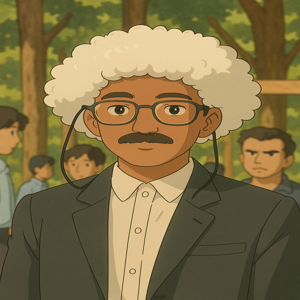

**📱 INSTAGRAM POST CONTENT:**

```
🖼️ CAPTION: Wisdom is not a product of schooling but of the lifelong attempt to acquire it. 🧠✨📚
🔖 HASHTAGS: #InspirationDaily #Motivation #KnowledgeIsPower
📝 DESCRIPTION: Let's embrace the journey of continuous learning! True wisdom blossoms when we commit to being lifelong students, always seeking knowledge and growth. What's one thing you're hoping to learn more about this year? Share in the comments! 👇

```

In [11]:

platform = "Instagram" #@param ["Instagram", "Twitter", "LinkedIn", "TikTok"]
tone = "inspirational" #@param ["funny", "serious", "inspirational", "casual"]
img = upload_image()
display(img.resize((300, 300)))
prompt = f"""
    Create social media content for {platform} with {tone} tone:
    1. Catchy caption (with emojis)
    2. 3 trending hashtags
    3. Engaging 50-word description

    Format STRICTLY as:
    🖼️ CAPTION: [text]
    🔖 HASHTAGS: #[1] #[2] #[3]
    📝 DESCRIPTION: [text]
"""
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, img]
)
display(Markdown(f"**📱 {platform.upper()} POST CONTENT:**"))
display(Markdown(f"```\n{response.text}\n```"))